<a href="https://colab.research.google.com/github/chakradharpallaka/YBI_FINAL_PROJECT/blob/main/MIELAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MIELAGE PREDICTION**

IMPORTING LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATASET

In [7]:
mil = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

DATA DESCRIPTION

In [9]:
mil.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

DATA CLEANING

In [10]:
mil = mil.dropna()

In [11]:
mil.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [14]:
mil.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [12]:
mil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [13]:
mil.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


DATA VISUALIZATION

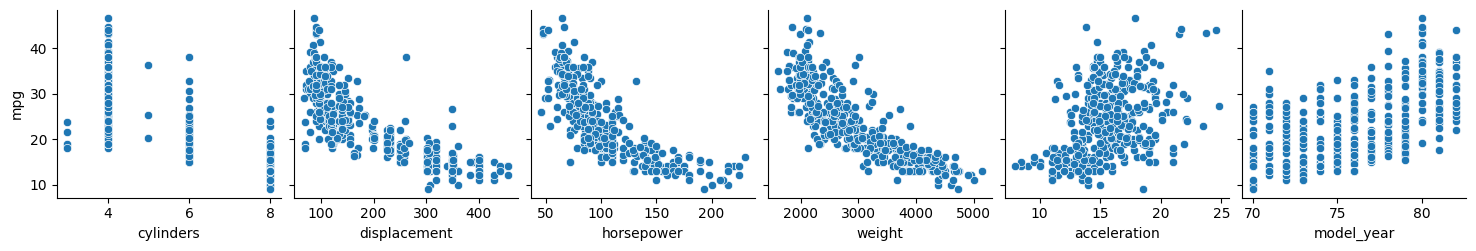

In [16]:
sns.pairplot(x_vars=['cylinders','displacement','horsepower','weight','acceleration','model_year'],y_vars='mpg',data = mil)

<Axes: xlabel='displacement', ylabel='mpg'>

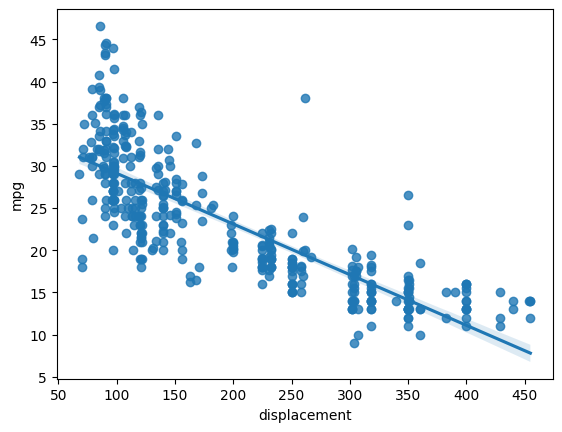

In [20]:
sns.regplot(x='displacement',y='mpg',data=mil)

<Axes: xlabel='horsepower', ylabel='mpg'>

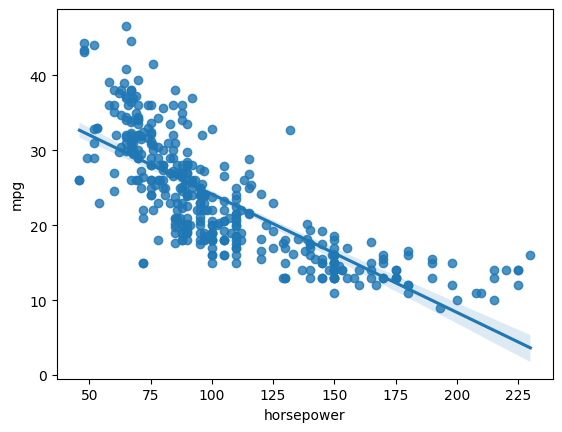

In [18]:
sns.regplot(x='horsepower',y='mpg',data=mil)

In [22]:
mil.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

DATA PREPROCESSING

In [23]:
y = mil['mpg']
x = mil.drop(['mpg','origin','name'],axis=1)

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

TRAIN TEST SPLIT

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529)

MODELING (SVM)

In [32]:
from sklearn.svm import SVC
m = SVC()

In [34]:
x_train = x_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [35]:
m.fit(x_train,y_train)

SVC()

MODEL EVALUATION

In [38]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error

In [39]:
y_pred = m.predict(x_test)
mean_absolute_percentage_error(y_test,y_pred)

0.15000163658742607

In [41]:
mean_absolute_error(y_test,y_pred)

3.377551020408163

In [42]:
mean_squared_error(y_test,y_pred)

22.56122448979592

MODELING(LINEAR REGRESSION)

In [44]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()

In [45]:
l.fit(x_train,y_train)

LinearRegression()

MODEL EVALUATION

In [46]:
y_pred = l.predict(x_test)
mean_absolute_percentage_error(y_test,y_pred)

0.17770486111488012

In [47]:
mean_absolute_error(y_test,y_pred)

3.673959384051062

In [48]:
mean_squared_error(y_test,y_pred)

21.604973480010887

MODELING(DECISION TREE)

In [49]:
from sklearn.tree import DecisionTreeRegressor
d = DecisionTreeRegressor()
d.fit(x_train,y_train)

DecisionTreeRegressor()

MODEL EVALUATION

In [50]:
y_pred = d.predict(x_test)
mean_absolute_percentage_error(y_test,y_pred)

0.14636645593690753

In [51]:
mean_absolute_error(y_test,y_pred)

3.233485543179421

In [52]:
mean_squared_error(y_test,y_pred)

20.283878975300354

MODELING(KNN)

In [54]:
from sklearn.neighbors import KNeighborsRegressor
k = DecisionTreeRegressor()
k.fit(x_train,y_train)

DecisionTreeRegressor()

MODEL EVALUATION

In [55]:
y_pred = k.predict(x_test)
mean_absolute_percentage_error(y_test,y_pred)

0.14636645593690753

In [56]:
mean_absolute_error(y_test,y_pred)

3.233485543179421

In [57]:
mean_squared_error(y_test,y_pred)

20.283878975300354